# Why People Really Quit Their Jobs?

![peces](http://4.bp.blogspot.com/-7_FVudvkdV4/Tt3pP5uQ_qI/AAAAAAAAAek/yIBC0K4DGSk/s1600/peces_nadando_en_el_agua_de_las_peceras.jpg)


### This dataset is related to the record of the employees in a company.

* It describes the **satisfaction level** of the employee, **last evaluation** of their performance, **number of projects** they done, their **average monthly working hours**, the **number of years** spent in the company, whether the employee had a **workplace accident**, whether the employee **left the workspace** , their **last promotion**, the **department** where the employee works and the **salary level**.

# 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import altair as alt
from vega_datasets import data
# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

# 2. Load Data

For the analysis it will be used a popular dataset called: "HR_comma_sep.csv". From now on : "HR_data_origin.csv". 

In [2]:
hr=pd.read_csv("data/HR_data_origin.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Brief description of columns in DataSet:

- **Satisfaction_level** : Level of employee satisfaction with their work and position. At first, it ties closely with employee turnover. 

- **Last_evaluation**: Column can be used to evaluate the performance of an employee. The data ranges from 0–1, 0 being low performance and 1 being the highest.

- **Number_projects**: number of projects employees done.

- **average_montly_hours**: average monthly hours per employee.

- **time_spend_company**: The data ranges from 1 to 10. Data unit not specified. It will be supposed _years_.

- **Work_accident**: Whether the employee had a workplace accident,: 1 yes, 0 no.

- **left**: Whether the employee has left or not the company: 1 yes, 0 no.

- **promotion_last_5years**: Whether the employee has had a promotion in the last 5 years.

- **Sales**: It seems to indicate the different areas or departments the employees belong: Sales, Technical, Support, IT, Product Managment, Marketing ,Accounting, Human Resources, Managment and Others.

- **Salary**: Salary level classified by Low, Medium, High.

# 3. Data Scrubbing 

Analize and understand the data in detail in order to make the right assumptions and choose the right algorithm:

* Size 
* Determine variable's type
* Some transformations: name of columns and type of the variables
* Is there any null value?
* Find and remove duplicates
* Descriptive analysis

In [3]:
#This dataset contains 14999 rows and 10 columns.
hr.shape

(14999, 10)

In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [20]:
hr.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
12086,0.17,0.84,5,232,3,0,1,0,sales,low
5447,0.50,0.75,5,179,3,0,0,0,accounting,low
8016,0.80,0.64,5,204,2,0,0,0,support,low
8085,0.33,0.39,3,98,3,1,0,0,RandD,low
3192,0.49,0.76,5,237,3,0,0,0,IT,high
13028,0.52,0.38,2,103,3,0,0,0,support,medium
1852,0.39,0.49,2,142,3,0,1,0,sales,low
2667,0.53,0.87,3,151,2,0,0,0,RandD,low
5673,0.76,0.87,4,161,3,0,0,0,sales,high
6541,0.67,0.65,5,242,3,0,0,0,support,low


Rename columns: 

* __"sales"__: seems to indicate the names of the departments in the company. To clarify, from now on "sales" column  will be called "department"
* __"Work_accident"__ : it will be converted to lowercase letters


In [10]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [11]:
hr_renamed =hr.rename(columns={'Work_accident':'work_accident','sales':'department'})

In [12]:
hr_renamed.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

Is there any missing data?

In [14]:
hr_renamed.isnull().sum()
#there isn't missing data

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [15]:
hr_renamed.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Transformation to numeric

In [22]:
hr_renamed['salary_numeric'] = hr_renamed['salary'].map({'low': 1, 'medium': 2, 'high':3})
hr_renamed.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,salary_numeric
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


Find and remove duplicates

In [23]:
len(hr_renamed[hr_renamed.duplicated]==True)

3008

In [24]:
#After validating the size of these elements I feel comfortable removing duplicates from the data set
hr_no_dupl= hr_renamed.drop_duplicates()
hr_no_dupl.shape

(11991, 11)

In [25]:
#Descriptive analysis
hr_no_dupl.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary_numeric
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.00000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,1.60387
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,0.63590
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.00000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,1.00000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.00000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,2.00000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.00000


It is observed that:
    
* Satisfaction level is around 63% and last evaluation(performance) is around 72%
* Almost the 17% of employees left the company
* Employees work 200 hours monthly and in average on 4 projects, spending  3 years at company in average
* Accidents happen in a 15% of times and promotions seems to be very low

# 4. Analysis and some Quick Visualitations

### Job distribution
_How many employees work in each department?_

Due to we unknow what this company is dedicated to, this analysis can be useful to determine the type of company segment.

In [26]:
headcount_by_department = hr_no_dupl.groupby('department')['left'].count().sort_values(ascending=False).reset_index()
headcount_by_department

,department,left
0,sales,3239
1,technical,2244
2,support,1821
3,IT,976
4,RandD,694
5,product_mng,686
6,marketing,673
7,accounting,621
8,hr,601
9,management,436


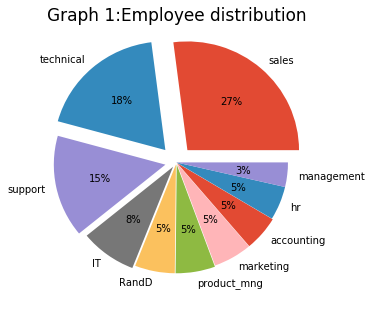

In [27]:
#graph:

plt.figure(figsize=(5,5))
explode=(0.15,0.15,0.1,0.05,0.02,0.02,0.01,0.01,0,0) #highlight the 4 main values
plt.pie(headcount_by_department.left,labels=headcount_by_department.department,autopct='%1d%%',explode=explode)
plt.title('Graph 1:Employee distribution',fontsize=17)
plt.show()

* Sales, Technical and Support are the departments with a higher number of employees (50% over total)

## Turnover rate

The term ‘employee turnover rate’ refers to the percentage of employees who leave an organization during a certain period of time. People usually include voluntary resignations, dismissals, non certifications and retirements in their turnover calculations. They normally don’t include internal movements like promotions or transfers. 

Source: [https://resources.workable.com/tutorial/calculate-employee-turnover-rate]

### Which is the turnover rate of this company?

Typically, turnover is measured on a month or annual basis. As a general rule, high rate is damaging to a company's revenue and profitability. As I unknow the period of time of this dataset, I will assume that it has been measured on annual basis. 

Here is the formula for annual turnover rate:

![image.png](https://www.brighthr.com/media/112089/how-to-calculate-staff-turnover-by-year.jpg)

To simplify, let's calculate the turnover rate as:

In [28]:
turnover_rate = round(hr_no_dupl['left'].mean()*100,1)
turnover_rate

16.6

So, I can determine that 17% of the employees left the company. Is it high, is it low, is it bad, is it good...?
Well, the ideal labour turnover will depend on the business and the industry the company work in. 

I have no enough information about the company and it seems not easy to discover it.  However what I can and try to find out and analyse is : __What are people leaving the company like and why they do it?__ 

### Which is the turnover rate by department?

In [29]:
turnover_by_department = round(hr_no_dupl.groupby('department')['left'].mean().sort_values(ascending=False)*100,1)
turnover_by_department

department
hr             18.8
accounting     17.6
technical      17.4
support        17.1
sales          17.0
marketing      16.6
IT             16.2
product_mng    16.0
RandD          12.2
management     11.9
Name: left, dtype: float64

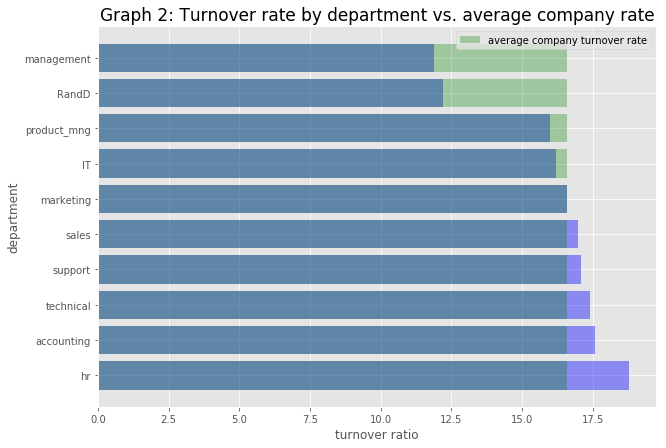

In [30]:
#this graph shows turnover ratio by department vs. Company ratio (16.6%)

plt.figure(figsize=(10,7))
plt.barh(turnover_by_department .index,turnover_by_department.values,color='blue',alpha=0.4)
plt.barh(turnover_by_department.index,turnover_rate,alpha=.3,color='green', label='average company turnover rate')
plt.xlabel('turnover ratio')
plt.ylabel('department')
plt.legend()
plt.title('Graph 2: Turnover rate by department vs. average company rate', fontsize= 17)
plt.show()

* Human Resources is the department with the highest turnover rate. 

* The departments with a higher number of employees (Sales, Technical and Support) are also above the average.

* Management is far below the average, probably (don't know yet) because their salaries are higher.

### Turnover by salary

Obviously the lower the salary, the greater the turnover

In [31]:
round(hr_no_dupl.groupby('salary')['left'].mean()*100,1).sort_values(ascending=False)

salary
low       20.5
medium    14.6
high       4.8
Name: left, dtype: float64

How does this ratio behave according to the different departments?

In [32]:
low = round((hr_no_dupl[hr_no_dupl['salary']=='low'].groupby('department')['left'].mean()*100).sort_values(ascending=False),1)
low

department
marketing      24.5
management     23.0
support        22.0
hr             20.9
technical      20.9
sales          20.5
accounting     19.9
IT             18.3
product_mng    17.2
RandD          15.8
Name: left, dtype: float64

In [33]:
medium = round((hr_no_dupl[hr_no_dupl['salary']=='medium'].groupby('department')['left'].mean()*100).sort_values(ascending=False),1)
medium

department
hr             18.0
accounting     17.9
product_mng    16.2
IT             15.6
sales          15.1
technical      15.1
support        14.0
management     11.2
marketing      11.0
RandD           9.5
Name: left, dtype: float64

In [34]:
high = round((hr_no_dupl[hr_no_dupl['salary']=='high'].groupby('department')['left'].mean()*100).sort_values(ascending=False),1)
high

department
hr             7.9
product_mng    7.7
RandD          6.4
technical      6.0
IT             5.6
sales          5.1
marketing      4.8
accounting     4.8
support        4.0
management     0.8
Name: left, dtype: float64

In [35]:
#all together:
salary_by_department = hr_no_dupl.groupby(['department','salary'])['left'].mean().reset_index().sort_values(by='left',ascending=True)
salary_by_department.sample(5)

,department,salary,left
10,hr,low,0.209459
19,product_mng,low,0.172012
28,technical,low,0.209139
7,accounting,low,0.199324
0,IT,high,0.056338


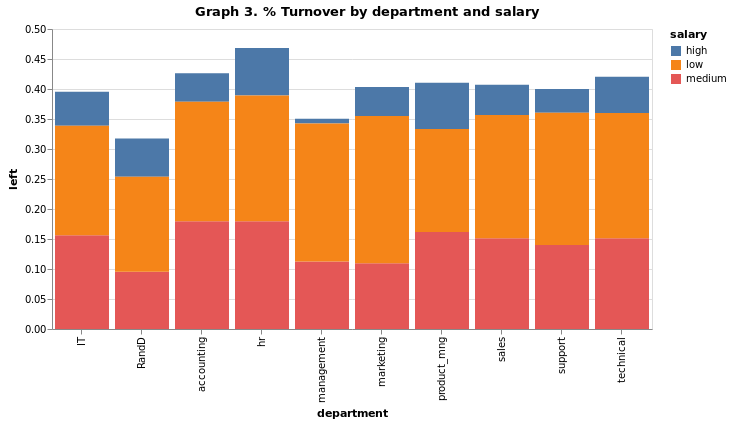

In [36]:
#graph:
turnover_rate_by_salary_and_department=alt.Chart(salary_by_department).mark_bar().encode(
    x="department:N",
    y="left",
    color="salary:N"
).properties(
    title="Graph 3. % Turnover by department and salary",
    width=600
).interactive()
turnover_rate_by_salary_and_department

As we can see in the graph although HR has the highest turnover rate, when I split it by salary the picture changes. 

* __High and medium__: the peack keeps being HR 
* __Low__: marketing, managment and support areas have the highest turnover rate. It is a fact that "salary" is a key factor to leave the company

### Could we know which variable has the most influence to stay or leave a job?

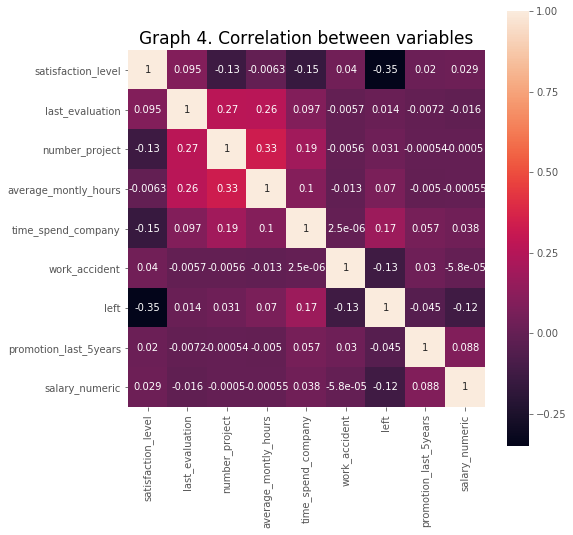

In [37]:
# Correlation heatmap
plt.figure(figsize=(8, 8)) 
sns.heatmap(hr_no_dupl.corr(), vmax=1, square=True,annot=True) 
plt.title("Graph 4. Correlation between variables", fontsize = 17)
plt.show()

#### Graph 4:  

* As expected, the **"satisfaction level" has the largest correlation with the decision to stay or leave** the company and it is negative (-0.35) 


* The correlation with the attribute **"Work_accident"** is also **negative(-0.13)** whereas with **"time_spend_company" it is positive (0.17)**

### Let's start by taking a look at the distribution of employees satisfaction level at company

In [38]:
#There are two well differenciated groups of employees
hr_no_dupl.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,salary_numeric
left,,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500,1.637600
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018,1.434455


In [39]:
#Definitions:
people_who_stay= hr_no_dupl[hr_no_dupl['left']==0] #people who stay 
people_who_leave= hr_no_dupl[hr_no_dupl['left']==1] #people who leave

### Which will be the satisfaction level distribution by these types of employee?

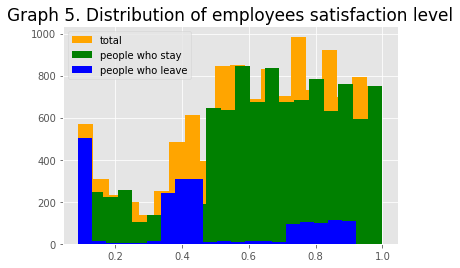

The average satisfaction level at company is 63%
    - for employees who leave is 44%
    - for employees who stay is 67%


In [41]:
#Graph:
plt.hist(hr_no_dupl.satisfaction_level,bins=20,color='orange',label='total') 
plt.hist(people_who_stay.satisfaction_level,bins=20,color='green',label='people who stay',) #people who stay
plt.hist(people_who_leave.satisfaction_level,bins=20,color='blue',label='people who leave') #people who leave
plt.title("Graph 5. Distribution of employees satisfaction level", fontsize = 17)
plt.legend()
plt.show()

print('The average satisfaction level at company is %.f'%(hr_no_dupl.satisfaction_level.mean()*100) + '%') 
print('    - for employees who leave is %.f' %(people_who_leave.satisfaction_level.mean()*100) + '%')
print('    - for employees who stay is %.f' %(people_who_stay.satisfaction_level.mean()*100) + '%')

For __people who leave the company__ (blue color) there are three different scenarios:
* 0         -> staff totally disappointed (the biggest group)
* around 0,4-> group with satisfaction level below the average
* 0.7-0.9   -> with high satisfacion and above the average 

It seems clear to think that employees who were disappointed in the company left (employees with a satisfaction level below the mean) but, what happens to those who were happy in the company, why do they left?

### Could salary be a strong reason to leave the job?

Salaries are lower in people who left so it could be a reason for leaving.

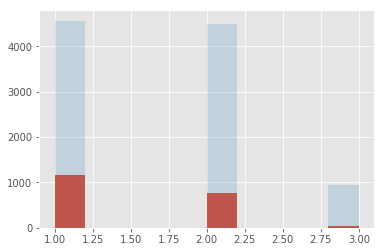

In [42]:
plt.hist(people_who_leave['salary_numeric'])
plt.hist(people_who_stay['salary_numeric'],alpha=0.2)
plt.show()

As expected, most people who left had low salaries

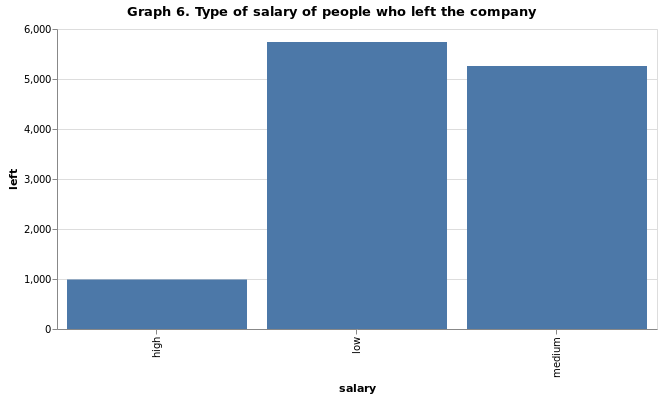

In [355]:
alt.Chart(hr_no_dupl.groupby(['salary'])['left'].count().reset_index()).mark_bar().encode(
    x="salary:N",
    y="left"
).properties(
    title="Graph 6. Type of salary of people who left the company",
    width=600
).interactive()

Having a look by department... 

+ Sales have the lowest salaries (medium and low) and it is the department with more people who left. There are some people whit high sales probably because of sales fees (as higher sales reached, more money paid)

+ Technical has the second place and Managment the last one.

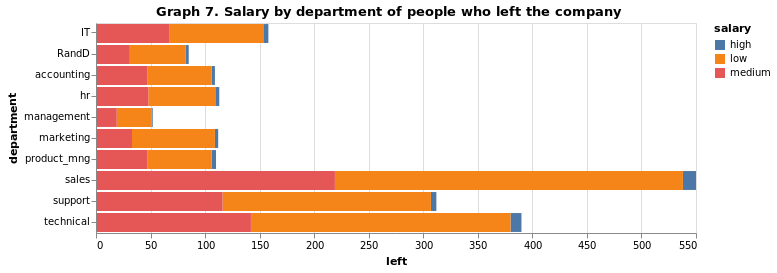

In [361]:
alt.Chart(people_who_leave.groupby(['salary','department'])['left'].count().reset_index()).mark_bar().encode(
    x="left",
    y="department",
    color='salary'
).properties(
    title="Graph 7. Salary by department of people who left the company",
    width=600
).interactive()

### Satisfaction level vs. time spend at company

There is a negative correlation (-0.15) between the **"time at company"** and the **"employee satisfaction level"**. It is not sure, but could seem to indicate that **the more years working in the company, the lower level of satisfaction** 

In [32]:
satisfaction_level_by_time_at_company = hr_no_dupl.groupby(['time_spend_company','left'])['satisfaction_level'].mean().reset_index().sort_values(by='left',ascending=False)
satisfaction_level_by_time_at_company.sample(5)

,time_spend_company,left,satisfaction_level
4,4,0,0.637901
2,3,0,0.697020
12,10,0,0.655327
5,4,1,0.144505
0,2,0,0.700907


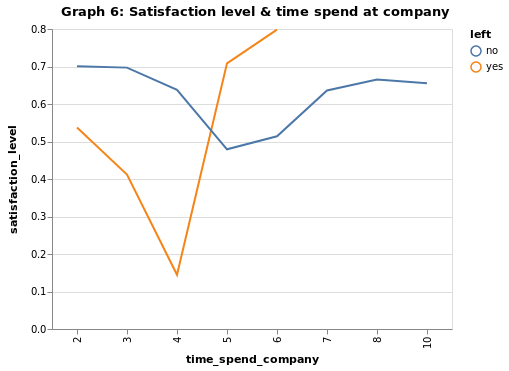

In [33]:
#legend
satisfaction_level_by_time_at_company['left']=satisfaction_level_by_time_at_company['left'].map({0:'no',1:'yes'})

#Graph:
evolution =alt.Chart(satisfaction_level_by_time_at_company).mark_line().encode(
    x="time_spend_company:N",
    y="satisfaction_level:Q",
    color="left:N"
).properties(
    title="Graph 6: Satisfaction level & time spend at company",
    width=400
).interactive()

evolution

Curiosities: 
* employees working more than 6 years didn't leave. 
* ten years is the maximum value so it could indicate it is a young company

The level of satisfaction begins to decrease in the third year and worsens to 4.5 years, probably due to the fact that promotions are scarce.

### From the point of view of the company, which are the most valuables employees?

In [88]:
most_valuables_employees = hr_no_dupl[hr_no_dupl['last_evaluation']>0.716683] #above the company average (72%) 
most_valuables_employees.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,salary_numeric
7820,0.12,0.84,4,218,6,0,0,0,technical,medium,2
9182,0.76,0.99,5,252,3,1,0,0,sales,low,1
2106,0.86,0.79,3,242,2,0,0,0,support,low,1
10250,0.64,1.00,4,201,2,0,0,0,sales,medium,2
7180,0.52,0.74,4,174,3,0,0,0,technical,medium,2


In [89]:
#How many are they?
len(most_valuables_employees)

6073

In [90]:
#How many have being promoted?
len(most_valuables_employees[most_valuables_employees['promotion_last_5years']==1])

98

In [50]:
most_valuables_employees.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary_numeric
count,203.00000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.0,203.000000
mean,0.66601,0.707438,3.798030,198.630542,3.940887,0.236453,0.039409,1.0,2.029557
std,0.20947,0.168318,1.031003,47.559202,2.026178,0.425954,0.195047,0.0,0.636445
min,0.11000,0.370000,2.000000,100.000000,2.000000,0.000000,0.000000,1.0,1.000000
25%,0.53000,0.575000,3.000000,157.000000,3.000000,0.000000,0.000000,1.0,2.000000
50%,0.70000,0.710000,4.000000,200.000000,3.000000,0.000000,0.000000,1.0,2.000000
75%,0.82500,0.835000,4.000000,239.500000,5.000000,0.000000,0.000000,1.0,2.000000
max,1.00000,1.000000,6.000000,292.000000,10.000000,1.000000,1.000000,1.0,3.000000


In [92]:
#Which is the turnover rate for this kind of employees?
most_valuables_employees['left'].mean()*100

17.717767166145233

In [93]:
#How many of these employees left the company?
len(most_valuables_employees[most_valuables_employees['left']==1])

1076

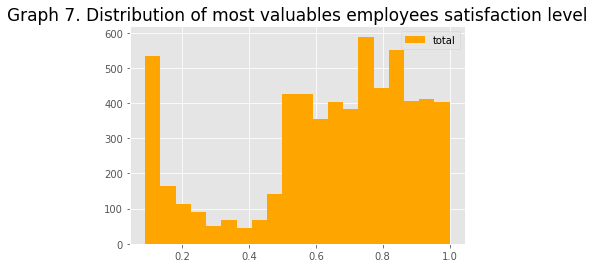

In [94]:
#Graph:
plt.hist(most_valuables_employees.satisfaction_level,bins=20,color='orange',label='total') 
plt.title("Graph 7. Distribution of most valuables employees satisfaction level", fontsize = 17)
plt.legend()
plt.show()

### Satisfaction level vs. number of projects

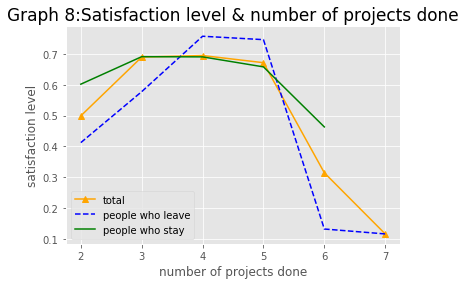

In [450]:
#Graph:
plt.plot(hr_no_dupl.groupby('number_project')['satisfaction_level'].mean(),'orange',label='total',marker='^')
plt.plot(people_who_leave.groupby('number_project')['satisfaction_level'].mean(),'b--',label='people who leave')
plt.plot(people_who_stay.groupby('number_project')['satisfaction_level'].mean(),'green',label='people who stay')
plt.ylabel('satisfaction level')
plt.xlabel('number of projects done')
plt.legend()
plt.title('Graph 8:Satisfaction level & number of projects done', fontsize = 17)
plt.show()

### Accidents

In [98]:
#Total Accidents in company
hr_no_dupl['work_accident'].sum()

1850

In [119]:
#How many accidents belong to each group of employees?
hr_no_dupl.groupby('left')['work_accident'].sum()

left
0    1745
1     105
Name: work_accident, dtype: int64

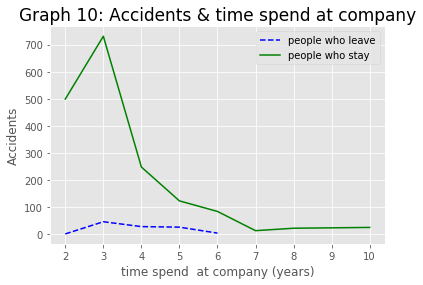

In [452]:
#How is the distribution over time? 
plt.plot(people_who_leave.groupby('time_spend_company')['work_accident'].sum(),'b--',label='people who leave')
plt.plot(people_who_stay.groupby('time_spend_company')['work_accident'].sum(),'green',label='people who stay')
plt.ylabel('Accidents')
plt.xlabel('time spend  at company (years)')
plt.legend()
plt.title('Graph 10: Accidents & time spend at company', fontsize = 17)
plt.show()

In [145]:
#What is the number of accidents split between people who stay and leave in the same period of time?
hr_no_dupl[hr_no_dupl['time_spend_company']<7].groupby('left')['work_accident'].sum()

left
0    1685
1     105
Name: work_accident, dtype: int64

In [144]:
#Which are the departments with more accidents?
hr_no_dupl.groupby('department')['work_accident'].sum().reset_index().sort_values(by='work_accident',ascending=False)

,department,work_accident
7,sales,498
9,technical,339
8,support,299
0,IT,139
1,RandD,119
6,product_mng,109
5,marketing,108
2,accounting,87
3,hr,80
4,management,72


In [101]:
#Focus on people who leave, which department has the greatest number of accidents? 

accidents= round(people_who_leave.groupby('department')['work_accident'].sum()/people_who_leave['work_accident'].sum()*100,2)
accidents.reset_index().sort_values(by='work_accident',ascending=False)

,department,work_accident
7,sales,29.52
9,technical,18.10
8,support,17.14
0,IT,6.67
1,RandD,6.67
2,accounting,4.76
3,hr,4.76
6,product_mng,4.76
4,management,3.81
5,marketing,3.81


In [102]:
hr_no_dupl.groupby('work_accident').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years
work_accident,,,,,,,
0,0.625546,0.717092,3.805640,200.741150,3.364856,0.185978,0.015284
1,0.652200,0.714438,3.787568,199.006486,3.364865,0.056757,0.025946


### Some conclusions and next steps

* Sales, Technical and Support are the departments with a higher number of employees (50% over total. _See graph 1_)

* The departments aforementioned, HR and Accounting have a turnover ratio above the average. Instead Management is far below the average, probably (don't know yet) because their salaries were higher (_See graph 2_)

* _Graph 3_ shows that:
    - the higher number of accidents take place during the third year working at company
    - people who left has less accidents than people who stay

# 5. Saving cleaned dataset

In [27]:
hr_no_dupl.to_csv('data/HR_data_cleaned.csv',index=False)